In [1]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import PromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from datetime import datetime
import numpy as np
import re
import pandas as pd
import os
import json
import pandas as pd
from datetime import datetime
import os
from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate
import json_repair


# Read PDF

In [62]:
import PyPDF2

file_path = r"C:\Users\avira\OneDrive - Trent University\Desktop\Old pc\Desktop\Canada docs\res and cv\Dikshant_Resume_DA (4) (1).pdf"
reader = PyPDF2.PdfReader(file_path)
page = reader.pages[0]
print(page.extract_text(0))
# print(page.extract_text(extraction_mode="layout"))


DIKSHANT  GUPT A
dikshantgupta18@gmail.com | +1(705)-977-7012 | North York, ON |
Github
|
Linkedin
|
Tableau Public Profile
SUMMAR Y 
Graduate student in Data Science with 3.5+ years of professional experience in the field of data science and technology . Skilled in building data 
pipelines, creating dashboards, datasets , and deriving actionable insights from complex data sets using Python, SQL, AWS, and ELK stack. 
Adept in both development and DevOps roles. Strong ability to drive projects from conceptualization to deployment.
EDUCA TION 
Masters in Data Science (AMOD)
| Trent University ,Peterborough,
ON |  Current GP A : 92.25/100
Graduating:
April 2023 
Relevant Coursework: Data Mining, Statistical Aspects of Modelling, Artificial Intelligence, Data Analytics with R , Data Science with Python
Bachelor  of Engineering in Computer  Science |
Chitkara
University , Punjab, India | Cumulative CGP A: 8.69/10.0
Aug 2014 - July 2018 
Relevant Coursework: Mathematics, Data Structures, Dat

In [2]:
def output_formatter(output:str):
    extracted_json = re.search(r'```json\n([\s\S]*?)\n```', output.content)
    if extracted_json:
        json_string = extracted_json.group(1)
    else:
        json_string = "[]"  # Fallback to an empty JSON array in case the extraction fails

    # Now, parse the extracted JSON string
    data = json_repair.loads(f"[{json_string}]")
    return(data)

In [3]:

llm_chatopenai = AzureChatOpenAI(
    api_key = 'ab40db4c57884de3bf7d8517677ab90e',
    api_version = '2023-03-15-preview',
    azure_endpoint = 'https://lucidmvpopenai.openai.azure.com/',
    temperature = 0,
    deployment_name = 'lucidpg'
    )

# response_schemas = [
#     ResponseSchema(name="TopKeywords", description="List of Top 10 keywords that are there in the Job Description")
# ]

response_schemas = [
    ResponseSchema(name="HardSills", description="List of Hard Skill's keywords that are there in the Job Description"),
    ResponseSchema(name="SoftSkills", description="List of Soft Skill's keywords that are there in the Job Description")
]

# response_schemas = [
#     ResponseSchema(name="Keywords_Found", description="List of keywords that are found in the Resume and are also there in Job Description"),
#     ResponseSchema(name="Keywords_Missing", description="List of keywords that are missing in the Resume and are also there in Job Description")
# ]

# response_schemas = [
#     ResponseSchema(name="Match_score", description="Eligibility match score according to Resume and Job Description")
# ]

output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()

print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"HardSills": string  // List of Hard Skill's keywords that are there in the Job Description
	"SoftSkills": string  // List of Soft Skill's keywords that are there in the Job Description
}
```


In [4]:
industry = 'Data Science'
Job_Profile = 'Data Scientist'
Job_Description = """
We are currently looking for a new Intermediate Data Scientist, to join our Data Insights team and work closely with Clio’s products and business teams.

You thrive on both analytical challenges and working closely with product development and customer-facing professionals. You will collaborate with everyone from product managers to business leaders and developers, and will guide rapid iterations of hypothesis, prioritization, experimentation / analysis and strategy setting – extract valuable insights, enhance our decision-making processes and contribute to the development of innovative financial products.

 

The team:
You will be working alongside a cross-functional team of data scientists, embedded within Clio’s products and business teams, developing AI and ML solutions to understand Clio’s customers, to bring them cutting-edge AI and GenAI products, and to recommend proactive and efficient ways to serve them better. You will play an integral role, enabling business leaders across Clio make rigorous data-driven decisions. You will help our business grow, help our customers succeed, and continuously improve the way we operate.


 

Who you are:
We aren’t looking for just any traditional Data Scientist to join this team. We’re looking for someone who takes data seriously, thrives in a rapid-growth, high-velocity environment, and lives and breathes our values. We’re looking for an innovator and a thought leader! We’re looking for someone who is:

Passionate about driving growth empirically;

Always looking to innovate with data and explore open-ended questions;

Strategically minded and never shies away from a challenge;

Self-motivated and able to work autonomously and collaboratively;

Agile and responsive, and comfortable with constant change.

You will help lay the foundation for this work by ensuring good data quality, data governance, and analytical practices. And you will also be part of our larger Data & AI team for learning, career development, and company-wide data initiatives.

What you'll work on:
Collaborate with the Clio products teams to refine business problems, develop hypotheses, and provide input that drives growth.

Suggest new questions about our business, product, and customers that lead to impactful insights.

Work with other team members to develop predictive AI and ML solutions and deploy them in production.

Apply rigorous statistical analysis and data mining techniques to evaluate impact of different product features and other business initiatives.

Employ statistical analysis, machine learning, GenAI, LLMs, etc. to unlock new product opportunities.

Support scientific thinking in product and business teams by enabling discussions with data, disseminating best practices, and leading by example.

Effectively communicate complex technical concepts and findings to both technical and non-technical audiences.

What you may have:
3+ years applied experience in data science.

The ability to translate business requirements into data science solutions.

Experience in developing analysis in Python and experience with relevant ML libraries and frameworks (e.g., pandas, PyTorch, scikit-learn)

Strong team player mindset, while able to work under your own initiative and prioritize time and tasks effectively.

Excellent written and verbal communication skills.

Ability to write structured SQL queries for answering questions and manipulating data.

Serious bonus points if you have:
Understanding of SaaS business metrics and growth drivers.

Experience with FinTech concepts.

Experience in analytics working with product and user behavior data, e.g., retention or churn analysis

Experience with building ML/AI pipelines and relevant tools (e.g., Kedro, MLFLow)

Experience with large data sets and user behavior data.

Experience with NLP and LLMs.

A graduate degree in a relevant quantitative discipline (computer science, statistics, mathematics, physics, engineering) 

What you will find here:

Compensation is one of the main components of Clio’s Total Rewards Program. We have developed a series of programs and processes to ensure we are creating fair and competitive pay practices that form the foundation of our human and high-performing culture.
 

Some highlights of our Total Rewards program include:

Competitive, equitable salary with top-tier health benefits, dental, and vision insurance 

Hybrid work environment, with expectation for local Clions (Vancouver, Calgary, Toronto, and Dublin) to be in office min. once per week on our Anchor Day. 

Flexible time off policy, with an encouraged 20 days off per year.

$2000 annual counseling benefit

RRSP matching and RESP contribution 

Clioversary recognition program with special acknowledgement at 3, 5, 7, and 10 years​

The expected salary range* for this role is $106,500 to $144,200 CAD. Please note there are a separate set of salary bands for other regions based on local currency.
*Our salary bands are designed to reflect the range of skills and experience needed for the position and to allow room for growth at Clio. For experienced individuals, we typically hire at or around the midpoint of the band. The top portion of the salary band is reserved for employees who demonstrate sustained high performance and impact at Clio. Those who are new to the role may join below the midpoint and develop their skills over time. The final offer amount for this role will be dependent on geographical region, applicable experience, and skillset of the candidate.

Diversity, Inclusion, Belonging and Equity (DIBE) & Accessibility 

Our team shows up as their authentic selves, and are united by our mission. We are dedicated to diversity, equity and inclusion. We pride ourselves in building and fostering an environment where our teams feel included, valued, and enabled to do the best work of their careers, wherever they choose to log in from. We believe that different perspectives, skills, backgrounds, and experiences result in higher-performing teams and better innovation. We are committed to equal employment and we encourage candidates from all backgrounds to apply.

Clio provides accessibility accommodations during the recruitment process. Should you require any accommodation, please let us know and we will work with you to meet your needs."""

In [5]:
resume = """
Aviral Walia

Contact Information:

Address: 123 Main St, Toronto, ON M1X 1Y2
Phone: (123) 456-7890
Email: aviral.walia@example.com
LinkedIn: linkedin.com/in/aviralwalia
Professional Summary:
Results-driven Data Scientist with 5 years of experience in technology and financial services. Proficient in Python, SQL, and machine learning techniques. Demonstrated ability to improve efficiency and enhance predictive models. Seeking to leverage analytical skills and expertise to drive data-driven decision-making.

Professional Experience:

Senior Data Scientist
ZENON AI, Toronto, ON
Jan 2021 – Present

Developed and deployed machine learning models to predict customer behavior, resulting in a 20% increase in retention rates.
Improved data processing efficiency by 30% through the implementation of advanced data pipelines.
Collaborated with cross-functional teams to develop credit risk models, reducing default rates by 15%.
Data Analyst
EXL Services, Toronto, ON
Jul 2018 – Dec 2020

Conducted data analysis to support business strategy and decision-making processes.
Automated reporting processes, reducing manual reporting time by 40%.
Built and maintained dashboards to track key performance indicators (KPIs).
Education:

Master of Science in Big Data Analytics
Trent University, Peterborough, ON
Expected Graduation: 2024

Bachelor of Technology in Computer Science
Chitkara University, Punjab, India
2018

Skills:

Programming Languages: Python, SQL
Data Analysis: Excel, VBA, Tableau
Machine Learning: Scikit-learn, TensorFlow
Data Processing: Pandas, NumPy
Tools: Elastic Search, NLP
Certifications:

Certified Data Scientist, Data Science Council of America (DASCA)
Projects:

Resume Optimizer: Developed an intelligent system using the LangChain framework to assess and enhance resumes based on job descriptions."""

In [6]:
resume_marketing = """ 
Aviral Walia

Contact Information:

Address: 789 Market St, Toronto, ON M3B 2S5
Phone: (123) 456-7890
Email: aviral.walia@example.com
LinkedIn: linkedin.com/in/aviralwalia
Professional Summary:
Insightful and analytical Market Researcher with over 4 years of experience in gathering, analyzing, and interpreting data to help companies make informed business decisions. Proficient in statistical analysis, survey design, and data visualization. Strong background in consumer behavior, market trends, and competitive analysis. Seeking to leverage my skills and expertise to drive data-driven strategies and business growth.

Professional Experience:

Market Research Analyst
ABC Market Solutions, Toronto, ON
Jan 2021 – Present

Conducted primary and secondary research to gather market intelligence on consumer preferences and industry trends.
Designed and administered surveys and questionnaires to collect quantitative and qualitative data.
Analyzed data using statistical software (SPSS, R) and presented findings to stakeholders through comprehensive reports and visualizations.
Identified market opportunities and provided actionable insights that contributed to a 15% increase in client sales.
Assistant Market Researcher
XYZ Insights, Toronto, ON
Jul 2018 – Dec 2020

Assisted in the design and execution of research projects, including data collection, analysis, and reporting.
Monitored and analyzed competitors' marketing strategies and performance metrics.
Developed and maintained databases of market research information and client contacts.
Supported senior researchers in preparing presentations and delivering insights to clients.
Education:

Bachelor of Science in Marketing
University of Toronto, Toronto, ON
2018

Skills:

Market Research: Survey Design, Data Collection, Competitive Analysis
Data Analysis: SPSS, R, Excel
Data Visualization: Tableau, Power BI
Statistical Analysis: Regression Analysis, Factor Analysis, Cluster Analysis
Communication: Report Writing, Presentation Skills
Certifications:

Certified Market Research Professional (CMRP)
Projects:

Consumer Behavior Study: Led a study on consumer behavior in the e-commerce sector, identifying key factors influencing purchase decisions and providing recommendations to improve customer retention.
Market Entry Analysis: Conducted a market entry analysis for a new product line, assessing market size, competition, and potential barriers, resulting in a successful product launch.
Brand Perception Survey: Designed and executed a brand perception survey for a leading retail company, analyzing customer feedback and suggesting strategies to enhance brand image."""

### Top Keywords JD

In [15]:

rel_base_prompt_data = '''Act as a {industry} industry Hiring manager.For a {Job_Profile} Job Profile, Given is the Job Description {Job_Description}.Extract the List of Top 20 Keywords from the given Job Description that should be in the cadidates resume to get shortlisted for the Job .\n{format_instructions}.\n'''

prompt = PromptTemplate(
    template = rel_base_prompt_data,
    input_variables=["industry" ,"Job_Profile","Job_Description"],
    partial_variables={"format_instructions": format_instructions}
)

_input = prompt.format_prompt(industry=industry,Job_Profile = Job_Profile,Job_Description = Job_Description)
output = llm_chatopenai(_input.to_messages())
keywords_JD = output_formatter(output)
print(keywords_JD)


[{'TopKeywords': ['Data Scientist', 'AI', 'ML', 'Python', 'SQL', 'FinTech', 'Analytics', 'Statistical Analysis', 'Data Mining', 'Product Development', 'Customer-facing', 'Data Quality', 'Data Governance', 'GenAI', 'LLMs', 'Communication Skills', 'Team Player', 'Flexible Time Off', 'Diversity', 'Inclusion']}]


### Top Keywords Resume

In [14]:
rel_base_prompt_data = '''Act as a {industry} industry Hiring manager.For a {Job_Profile} Job Profile, Given is the Resume {resume}.Extract the List of Top 20 Keywords from the given Resume that are there in the cadidates resume to get shortlisted for the Job .\n{format_instructions}.\n'''

prompt = PromptTemplate(
    template = rel_base_prompt_data,
    input_variables=["industry" ,"Job_Profile" ,"resume"],
    partial_variables={"format_instructions": format_instructions}
)

_input = prompt.format_prompt(industry=industry,Job_Profile = Job_Profile, resume = resume_marketing)
output = llm_chatopenai(_input.to_messages())
keywords_resume = output_formatter(output)
print(keywords_resume)

[{'TopKeywords': ['Market Research', 'Data Analysis', 'Data Visualization', 'Statistical Analysis', 'Consumer Behavior', 'Survey Design', 'Competitive Analysis', 'SPSS', 'R', 'Report Writing', 'Presentation Skills', 'Certified Market Research Professional', 'Market Intelligence', 'Industry Trends', 'Quantitative Data', 'Qualitative Data', 'Market Opportunities', 'Actionable Insights', 'Brand Perception', 'Customer Retention']}]


### Hard Skills & Soft Skills JD

In [7]:
rel_base_prompt_data_2 = '''Act as a {industry} industry Hiring manager.For a {Job_Profile} Job Profile, Given is the Job Description {Job_Description}.Extract the list of all hard skills and soft skills keywords from the given Job Description that should be in the cadidates resume to get shortlisted for the Job .\n{format_instructions}.\n'''

prompt = PromptTemplate(
    template = rel_base_prompt_data_2,
    input_variables=["industry" ,"Job_Profile","Job_Description"],
    partial_variables={"format_instructions": format_instructions}
)

_input = prompt.format_prompt(industry=industry,Job_Profile = Job_Profile,Job_Description = Job_Description)
output = llm_chatopenai(_input.to_messages())
hss_JD = output_formatter(output)
print(hss_JD)


c:\Users\avira\OneDrive - Trent University\Desktop\Final Project\ResumeOptimizer\venv\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


[{'HardSkills': ['data science', 'Python', 'ML libraries', 'pandas', 'PyTorch', 'scikit-learn', 'SQL', 'SaaS business metrics', 'FinTech concepts', 'analytics', 'user behavior data', 'retention analysis', 'churn analysis', 'ML/AI pipelines', 'Kedro', 'MLFLow', 'large data sets', 'NLP', 'LLMs', 'computer science', 'statistics', 'mathematics', 'physics', 'engineering'], 'SoftSkills': ['analytical', 'collaborative', 'innovative', 'self-motivated', 'agile', 'responsive', 'excellent communication', 'team player', 'prioritization', 'flexibility', 'adaptability', 'problem-solving', 'strategic thinking']}]


In [12]:
hss_JD[0]['HardSkills'] , hss_JD[0]['SoftSkills']

(['data science',
  'Python',
  'ML libraries',
  'pandas',
  'PyTorch',
  'scikit-learn',
  'SQL',
  'SaaS business metrics',
  'FinTech concepts',
  'analytics',
  'user behavior data',
  'retention analysis',
  'churn analysis',
  'ML/AI pipelines',
  'Kedro',
  'MLFLow',
  'large data sets',
  'NLP',
  'LLMs',
  'computer science',
  'statistics',
  'mathematics',
  'physics',
  'engineering'],
 ['analytical',
  'collaborative',
  'innovative',
  'self-motivated',
  'agile',
  'responsive',
  'excellent communication',
  'team player',
  'prioritization',
  'flexibility',
  'adaptability',
  'problem-solving',
  'strategic thinking'])

### Hard Skills & Soft Skills Resume

In [8]:
rel_base_prompt_data_2 = '''Act as a {industry} industry Hiring manager.For a {Job_Profile} Job Profile, Given is the Resume {resume}.Extract the list of all hard skills and soft skills keywords from the given Resume that are in the cadidates resume to get shortlisted for the Job .\n{format_instructions}.\n'''

prompt = PromptTemplate(
    template = rel_base_prompt_data_2,
    input_variables=["industry" ,"Job_Profile","Job_Description"],
    partial_variables={"format_instructions": format_instructions}
)

_input = prompt.format_prompt(industry=industry,Job_Profile = Job_Profile,resume = resume_marketing)
output = llm_chatopenai(_input.to_messages())
hss_Res = output_formatter(output)
print(hss_Res)


[{'HardSkills': ['Market Research', 'Survey Design', 'Data Collection', 'Competitive Analysis', 'SPSS', 'R', 'Excel', 'Tableau', 'Power BI', 'Regression Analysis', 'Factor Analysis', 'Cluster Analysis'], 'SoftSkills': ['Communication', 'Report Writing', 'Presentation Skills']}]


In [11]:
hss_Res[0]['HardSkills'] , hss_Res[0]['SoftSkills']

(['Market Research',
  'Survey Design',
  'Data Collection',
  'Competitive Analysis',
  'SPSS',
  'R',
  'Excel',
  'Tableau',
  'Power BI',
  'Regression Analysis',
  'Factor Analysis',
  'Cluster Analysis'],
 ['Communication', 'Report Writing', 'Presentation Skills'])

### Keywords Found - Keywords Missing

In [7]:

rel_base_prompt_data_2 = '''
Act as an Keyword or text Matcher of Resumes.For the {Job_Profile} position. Given the Job Description: {Job_Description} and the Resume: {resume}, perform the following tasks:
1. Extract and list all keywords found in both the resume and the job description.
2. Extract and list all keywords present in the job description but missing from the resume.
Make sure you only output both the lists and nothing else in pre or post and the keywords found should be from Resume and Keywords missing should be from Job Description only.
Provide the results in the following format: 
{format_instructions}
'''

prompt = PromptTemplate(
    template = rel_base_prompt_data_2,
    input_variables=["industry" ,"Job_Profile","Job_Description","resume"],
    partial_variables={"format_instructions": format_instructions}
)

_input = prompt.format_prompt(industry=industry,Job_Profile = Job_Profile,Job_Description = Job_Description, resume = resume_marketing)
output = llm_chatopenai(_input.to_messages())
key_mis_foun = output_formatter(output)
print(key_mis_foun)

content='```json\n{\n\t"Keywords_Found": "data scientist, analytical, product development, collaboration, hypothesis, experimentation, strategy, insights, decision-making, AI, ML, business leaders, growth, innovation, data quality, data governance, SQL, SaaS, FinTech, analytics, user behavior, statistical analysis, machine learning, NLP, LLMs, Python, pandas, PyTorch, scikit-learn, communication",\n\t"Keywords_Missing": "intermediate, Clio, team, cross-functional, GenAI, predictive, Kedro, MLFLow, quantitative, compensation, Total Rewards, equity, accessibility"\n}\n```' response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 1880, 'total_tokens': 2014}, 'model_name': 'gpt-35-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}} id='run-b083ed10-1579-47c0-81b8-bfb0ff321415-0' usage_metadata={'input_tokens': 1880, 'output_tokens': 134, 'total_tokens': 2014}


### Match Score

In [18]:
rel_base_prompt_data_2 = '''
Act as an Keyword or text Matcher of Resumes.For the {Job_Profile} position. Given the Job Description: {Job_Description} and the Resume: {resume}, perform the following tasks:
1. Based on the text matching , skills matching and other job requirements ,calculate a match score ranging between 0-100 that tells how eligible a candidate is for the given Job.
Make sure you only output a score.
Provide the results in the following format: 
{format_instructions}
'''

prompt = PromptTemplate(
    template = rel_base_prompt_data_2,
    input_variables=["industry" ,"Job_Profile","Job_Description","resume"],
    partial_variables={"format_instructions": format_instructions}
)

_input = prompt.format_prompt(industry=industry,Job_Profile = Job_Profile,Job_Description = Job_Description, resume = resume_marketing)
output = llm_chatopenai(_input.to_messages())
match_score = output_formatter(output)
print(match_score)

content='```json\n{\n\t"Match_score": "60"  \n}\n```' response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 1824, 'total_tokens': 1839}, 'model_name': 'gpt-35-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}} id='run-6d3babc6-fa15-4cf3-98cd-f3d3a0470563-0' usage_metadata={'input_tokens': 1824, 'output_tokens': 15, 'total_tokens': 1839}


# Charts

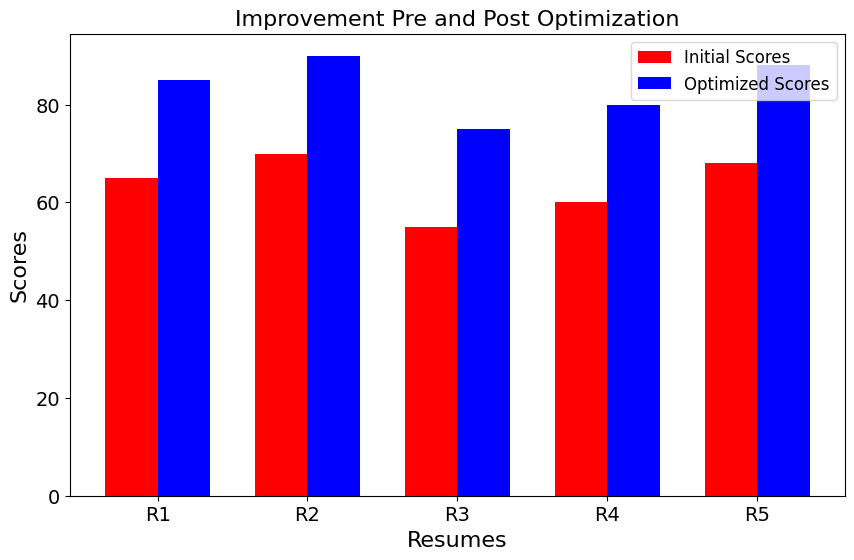

In [53]:
import matplotlib.pyplot as plt

# Sample data
resumes = ['R1', 'R2', 'R3', 'R4', 'R5']
initial_scores = [65, 70, 55, 60, 68]
optimized_scores = [85, 90, 75, 80, 88]

import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(resumes))

bar1 = ax.bar(index, initial_scores, bar_width, label='Initial Scores',color='red')
bar2 = ax.bar(index + bar_width, optimized_scores, bar_width, label='Optimized Scores',color='blue')

ax.set_xlabel('Resumes', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.set_title('Improvement Pre and Post Optimization', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(resumes, fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=12)

plt.show()



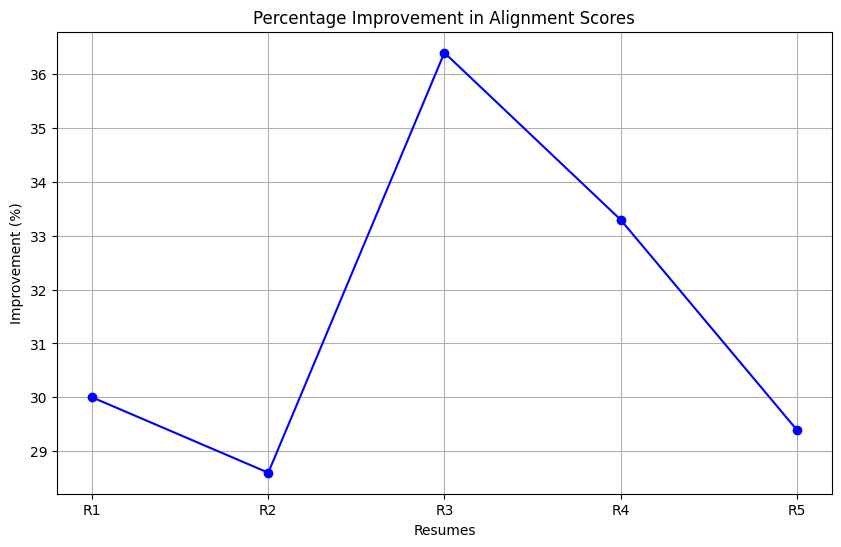

In [15]:
# Sample data
improvement_percentages = [30, 28.6, 36.4, 33.3, 29.4]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(resumes, improvement_percentages, marker='o', linestyle='-', color='b')
plt.xlabel('Resumes')
plt.ylabel('Improvement (%)')
plt.title('Percentage Improvement in Alignment Scores')
plt.grid(True)
plt.show()

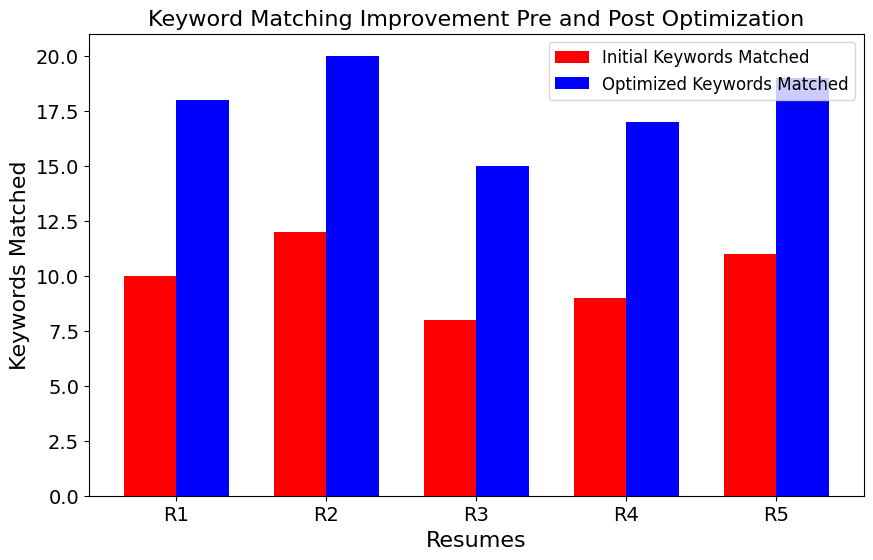

In [52]:
import numpy as np

# Sample data
initial_keywords = [10, 12, 8, 9, 11]
optimized_keywords = [18, 20, 15, 17, 19]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(resumes))

bar1 = ax.bar(index, initial_keywords, bar_width, label='Initial Keywords Matched',color='red')
bar2 = ax.bar(index + bar_width, optimized_keywords, bar_width, label='Optimized Keywords Matched',color='blue')

ax.set_xlabel('Resumes', fontsize=16)
ax.set_ylabel('Keywords Matched', fontsize=16)
ax.set_title('Keyword Matching Improvement Pre and Post Optimization', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(resumes, fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=12)

plt.show()


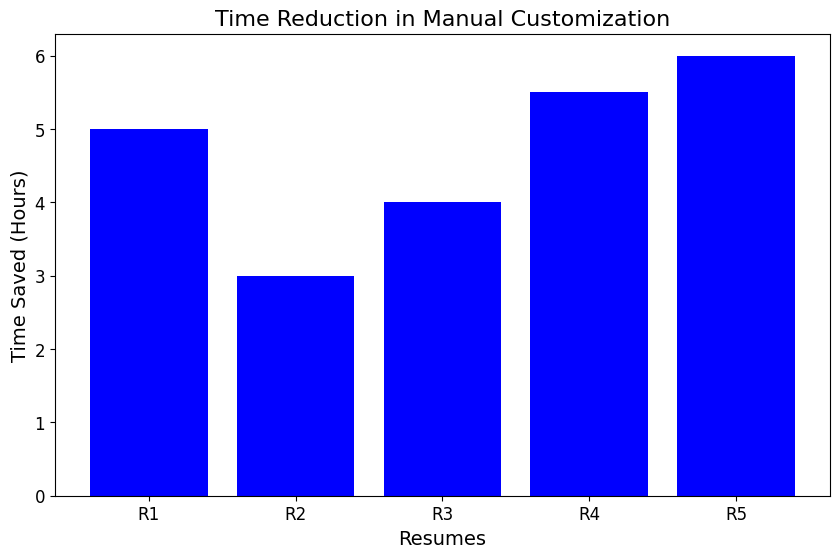

In [49]:
# Sample data
time_saved = [5, 3, 4, 5.5, 6]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(resumes, time_saved, color='blue')
plt.xlabel('Resumes', fontsize=14)
plt.ylabel('Time Saved (Hours)', fontsize=14)
plt.title('Time Reduction in Manual Customization', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


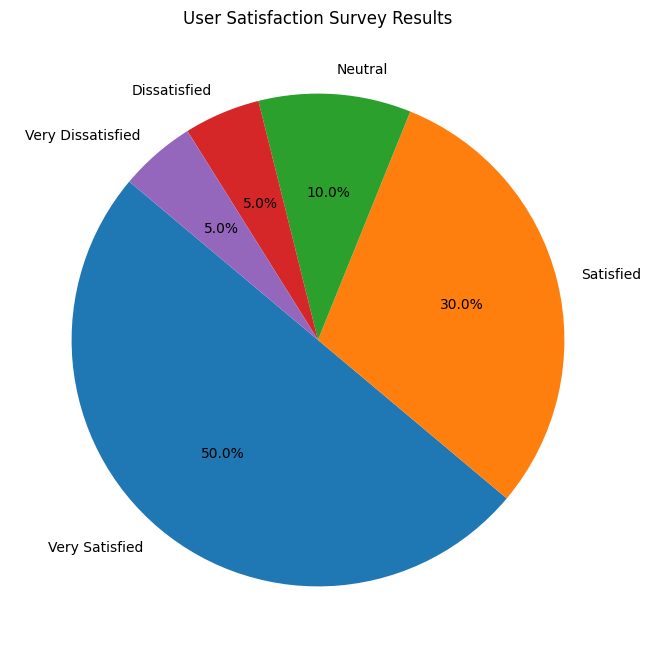

In [20]:
# Sample data
survey_results = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied']
counts = [50, 30, 10, 5, 5]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=survey_results, autopct='%1.1f%%', startangle=140)
plt.title('User Satisfaction Survey Results')
plt.show()



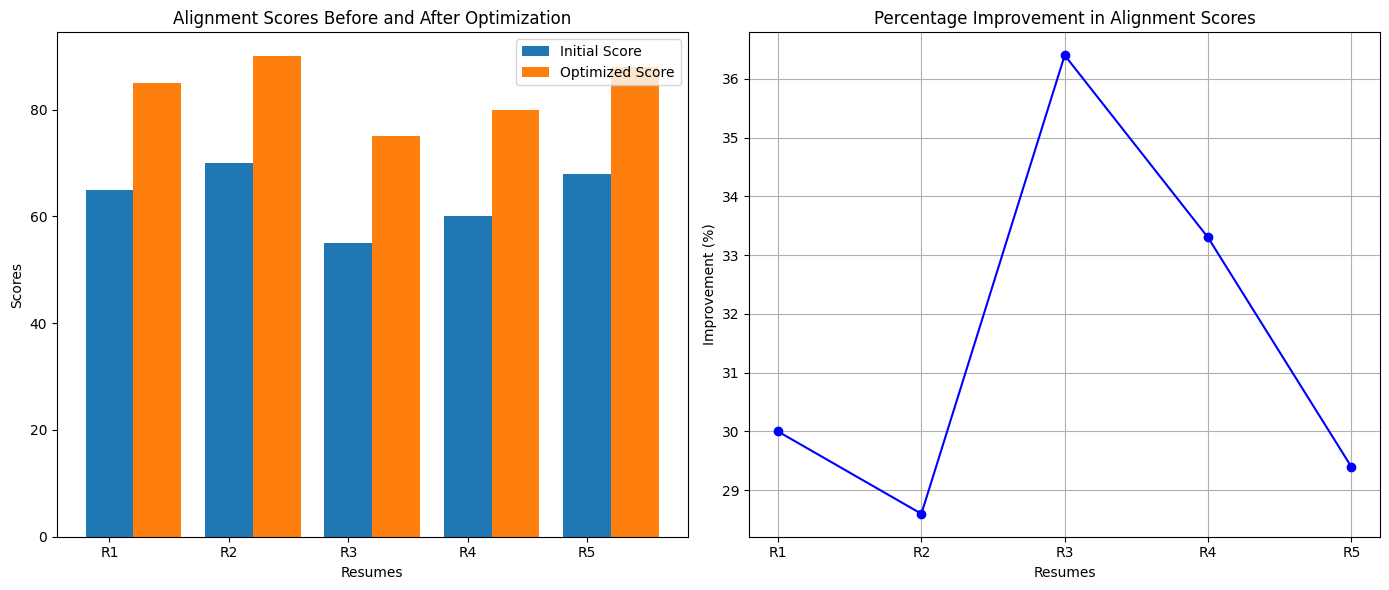

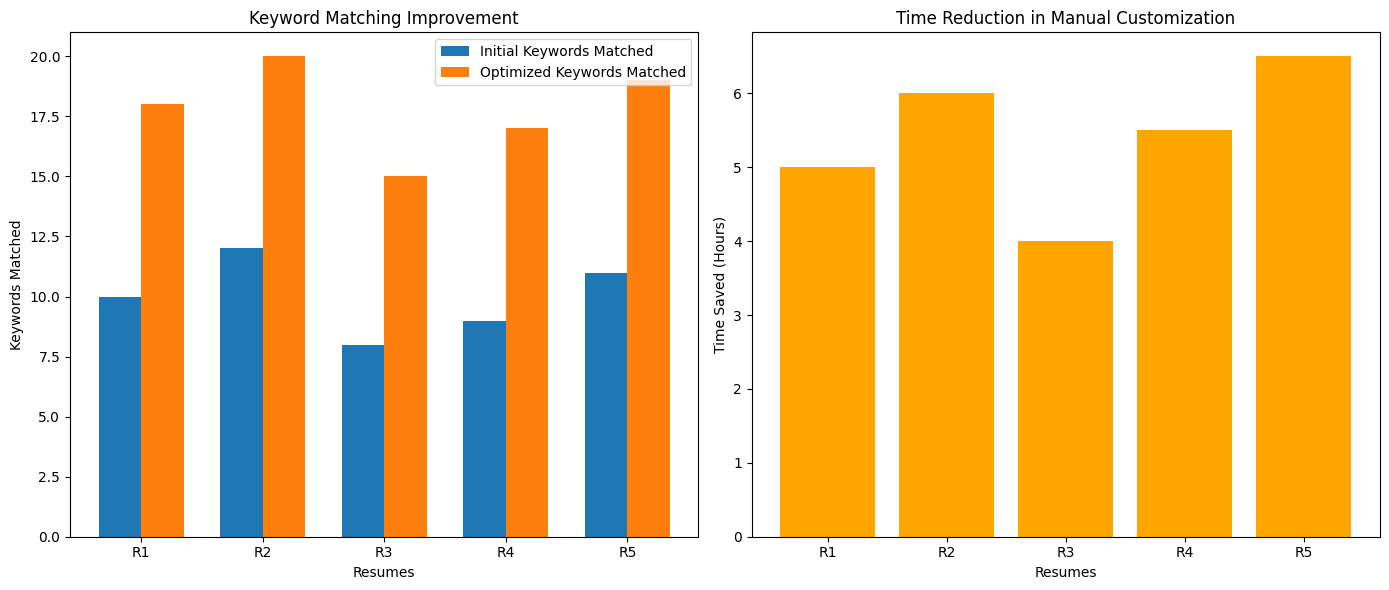

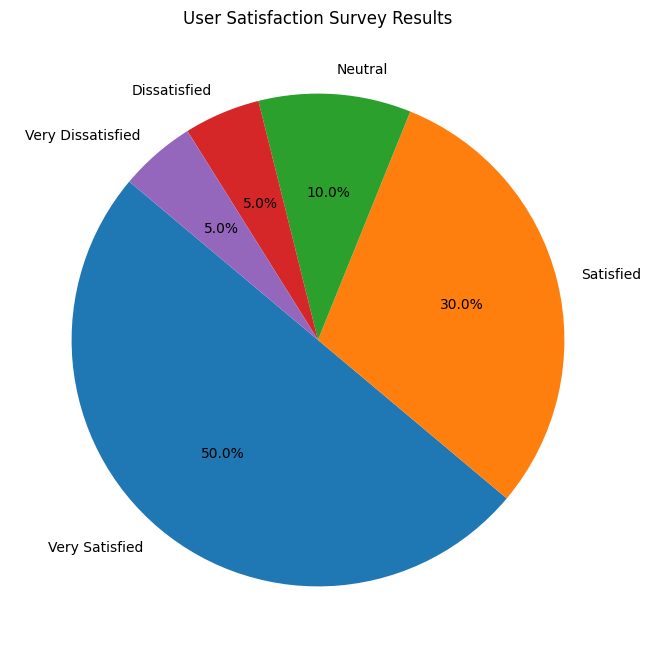

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
resumes = ['R1', 'R2', 'R3', 'R4', 'R5']
initial_scores = [65, 70, 55, 60, 68]
optimized_scores = [85, 90, 75, 80, 88]
improvement_percentages = [30, 28.6, 36.4, 33.3, 29.4]
initial_keywords = [10, 12, 8, 9, 11]
optimized_keywords = [18, 20, 15, 17, 19]
time_saved = [5, 6, 4, 5.5, 6.5]
survey_results = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied']
counts = [50, 30, 10, 5, 5]

# Plotting side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Alignment Scores Before and After Optimization
axs[0].bar(resumes, initial_scores, width=0.4, label='Initial Score')
axs[0].bar(np.arange(len(resumes)) + 0.4, optimized_scores, width=0.4, label='Optimized Score')
axs[0].set_xlabel('Resumes')
axs[0].set_ylabel('Scores')
axs[0].set_title('Alignment Scores Before and After Optimization')
axs[0].legend()

# Graph 2: Percentage Improvement in Alignment Scores
axs[1].plot(resumes, improvement_percentages, marker='o', linestyle='-', color='b')
axs[1].set_xlabel('Resumes')
axs[1].set_ylabel('Improvement (%)')
axs[1].set_title('Percentage Improvement in Alignment Scores')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Additional graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graph 3: Keyword Matching Improvement
bar_width = 0.35
index = np.arange(len(resumes))

bar1 = axs[0].bar(index, initial_keywords, bar_width, label='Initial Keywords Matched')
bar2 = axs[0].bar(index + bar_width, optimized_keywords, bar_width, label='Optimized Keywords Matched')
axs[0].set_xlabel('Resumes')
axs[0].set_ylabel('Keywords Matched')
axs[0].set_title('Keyword Matching Improvement')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(resumes)
axs[0].legend()

# Graph 4: Time Reduction in Manual Customization
axs[1].bar(resumes, time_saved, color='orange')
axs[1].set_xlabel('Resumes')
axs[1].set_ylabel('Time Saved (Hours)')
axs[1].set_title('Time Reduction in Manual Customization')

plt.tight_layout()
plt.show()

# Graph 5: User Satisfaction Survey Results
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=survey_results, autopct='%1.1f%%', startangle=140)
plt.title('User Satisfaction Survey Results')
plt.show()
